In [1]:
import psycopg2
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = psycopg2.connect(dbname='therapist_predictor', user='postgres', host='localhost', password='password')

In [3]:
sql = "select * from therapists;"
sql_age = 'SELECT * FROM age_groups;'
sql_issues = 'SELECT  * FROM issues;'
sql_orientations = 'SELECT * FROM orientations'
sql_professions = 'SELECT * FROM professions'
sql_services = 'SELECT * FROM services'

df = pd.read_sql_query(sql, conn)
df_age_groups = pd.read_sql_query(sql_age, conn)
df_issues = pd.read_sql_query(sql_issues, conn)
df_orientations = pd.read_sql_query(sql_orientations, conn)
df_professions = pd.read_sql_query(sql_professions, conn)
df_services = pd.read_sql_query(sql_services, conn)

conn = None
df.head()

,therapist_id,first_name,last_name,street,primary_credential,license_status,website,info_source,creation_date,verified,...,school,year_graduated,writing_sample,full_name,html_source_code,phone,state,city,zip_code,orig_writing
0,1032,Risa,Giordano,None,Clinical Social Work - R044522-1,I'm a licensed professional.,None,goodtherapy,2020-05-24 01:30:54.894274,True,...,None,None,My own personal experience with psychotherapy ...,Risa Giordano,None,None,New York,New York City,10022,My own personal experience with psychotherapy ...
1,107,Carly,Johnson,90 Madison Street,Psychologist,I'm a licensed professional.,http:www.iapsychology.com,goodtherapy,2020-05-12 19:19:26.917258,True,...,None,None,My approach to therapy is founded on a deep re...,Carly Johnson,None,720-295-6156,Colorado,Denver,80206,My approach to therapy is founded on a deep re...
2,111,Susan,Heitler,4500 E 9th Ave,Psychologist,I'm a licensed professional.,http:www.TherapyHelp.com,goodtherapy,2020-05-12 19:19:39.590171,True,...,None,None,I love seeing my clients move from distress to...,Susan Heitler,None,303-388-4211,Colorado,Denver,80220,I love seeing my clients move from distress to...
3,114,Nancy,Bortz,None,Registered Psychotherapist- DORA - NLC.0104498,I'm a licensed professional.,http:www.nancybortz.com,goodtherapy,2020-05-12 19:19:50.229102,True,...,None,None,These last several weeks and in moving forward...,Nancy Bortz,None,720-232-3776,Colorado,Denver,80220,These last several weeks and in moving forward...
4,126,Mark,Palmer,1776 S. Jackson St.,Licensed Psychologist,I'm a licensed professional.,http:www.marktpalmerphd.com,goodtherapy,2020-05-12 19:26:34.824618,True,...,None,None,Sometimes life can feel like life has gotten a...,Mark Palmer,None,720-271-2199,Colorado,Denver,80210,Sometimes life can feel like life has gotten a...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4062 entries, 0 to 4061
Data columns (total 23 columns):
therapist_id          4062 non-null int64
first_name            4062 non-null object
last_name             4062 non-null object
street                3463 non-null object
primary_credential    3986 non-null object
license_status        4062 non-null object
website               4062 non-null object
info_source           4062 non-null object
creation_date         4062 non-null datetime64[ns]
verified              4062 non-null bool
license_num           0 non-null object
license_state         0 non-null object
years_in_practice     0 non-null object
school                0 non-null object
year_graduated        0 non-null object
writing_sample        4062 non-null object
full_name             4062 non-null object
html_source_code      0 non-null object
phone                 4052 non-null object
state                 4062 non-null object
city                  4062 non-null object
zip

In [7]:
plt.rcParams['font.family'] = 'Ubuntu'
plt.rcParams['font.weight'] = 'normal'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['figure.figsize'] = [10,6]

seven_colors = ['#001d8f','#774cb2','#bf84d6','#ffc3ff','#f995cd','#ed6892','#d43d51']

five_colors_purp_red = ['#001d8f','#9c67c4','#ffc3ff','#f47fb0','#d43d51']

five_colors_blue_red = ['#0ca7c9','#9ebdf3','#f6d5ff','#ee8ab8','#d43d51']

five_dark_blue_yellow = ['#003f5c','#58508d','#bc5090','#ff6361','#ffa600']

asd = ['#6ca3bd','#afbcea','#ffd2ff','#f288b4','#d43d51']

five_green_red = ['#13bdb4',
'#80d090',
'#dad977',
'#e49046',
'#d43d51']

palette = five_green_red
plt.rcParams.keys()

/home/cgridley/anaconda3/lib/python3.7/_collections_abc.py:705: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  return '{0.__class__.__name__}({0._mapping!r})'.format(self)


KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

<BarContainer object of 5 artists>

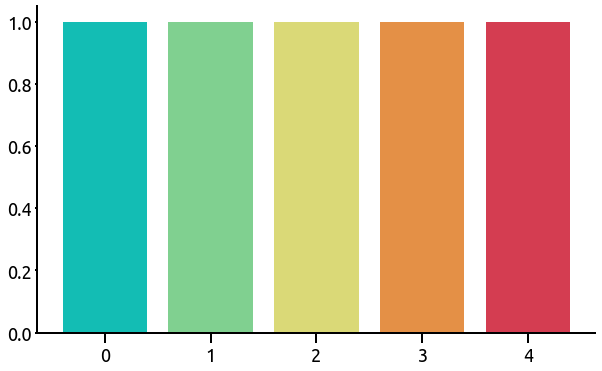

In [8]:
fig, axes = plt.subplots()
heights = np.ones(len(palette))
labels = [i for i in range(len(palette))]
c = [c for c in palette]
axes.bar(height=heights, x=labels, color=c)

In [9]:
writing_lengths = []
for body in df['writing_sample']:
    writing_lengths.append(len(body))
    
writing_lengths.sort()
writing_lengths

[0,
 0,
 0,
 1,
 60,
 66,
 70,
 86,
 89,
 97,
 103,
 114,
 127,
 132,
 135,
 135,
 144,
 160,
 169,
 183,
 187,
 204,
 205,
 209,
 216,
 219,
 223,
 232,
 234,
 237,
 239,
 241,
 242,
 243,
 248,
 248,
 249,
 250,
 252,
 256,
 258,
 259,
 260,
 268,
 273,
 276,
 283,
 286,
 301,
 301,
 307,
 309,
 311,
 319,
 320,
 322,
 322,
 322,
 327,
 331,
 331,
 332,
 336,
 336,
 341,
 343,
 343,
 343,
 344,
 351,
 352,
 355,
 355,
 358,
 361,
 362,
 362,
 364,
 367,
 368,
 369,
 373,
 376,
 377,
 380,
 382,
 383,
 384,
 386,
 388,
 393,
 394,
 395,
 400,
 406,
 408,
 408,
 411,
 417,
 420,
 422,
 422,
 423,
 425,
 430,
 431,
 439,
 440,
 441,
 442,
 443,
 443,
 445,
 448,
 448,
 449,
 450,
 450,
 454,
 456,
 458,
 458,
 459,
 460,
 460,
 469,
 469,
 469,
 471,
 472,
 477,
 478,
 480,
 480,
 481,
 489,
 491,
 492,
 492,
 493,
 495,
 496,
 496,
 496,
 498,
 500,
 506,
 508,
 511,
 516,
 516,
 518,
 519,
 519,
 521,
 521,
 522,
 523,
 524,
 524,
 525,
 528,
 529,
 531,
 532,
 535,
 536,
 536,
 538,


In [10]:
print(f'Writing Length Range\nShortest description: {np.min(writing_lengths)} - Longest description: {np.max(writing_lengths)}')

Writing Length Range
Shortest description: 0 - Longest description: 22689


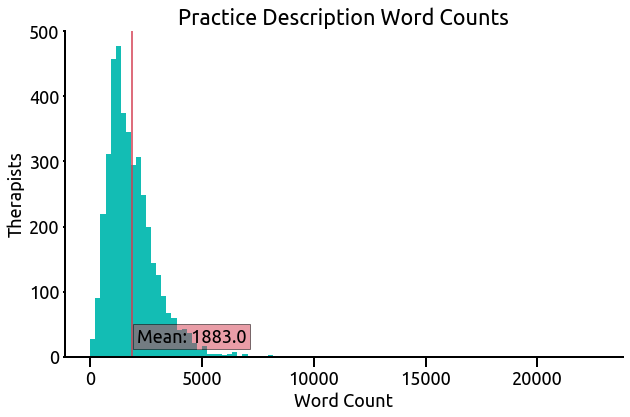

In [11]:
mean = np.mean(writing_lengths)
mean_label = f'Mean: {np.around(mean, decimals=0)}'
c1 = palette[0]
c2 = palette[4]
fig, ax = plt.subplots()
ax.set_xlabel('Word Count')
ax.set_ylabel('Therapists')
ax.set_title('Practice Description Word Counts')
ax.hist(writing_lengths, bins=100, color=c1)
ax.axvline(x=mean, c=c2)
plt.text(mean+200, 22, mean_label, bbox=dict(facecolor=c2, alpha=0.5))
plt.savefig('../img/word_count_hist.png')
plt.show()

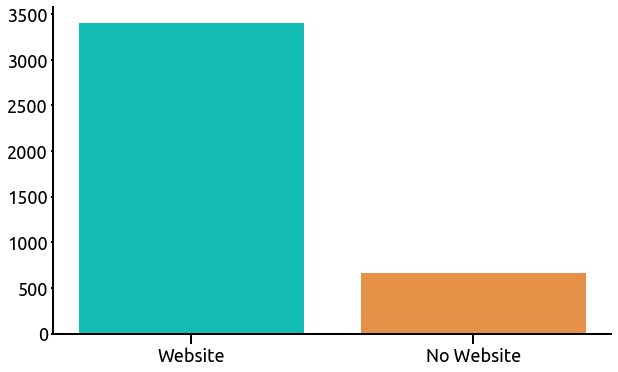

In [12]:
mask_no_website = df['website']=='None'
height = [df[~mask_no_website]['website'].size, df[mask_no_website]['website'].size]
labels = ['Website', 'No Website']

c = [palette[0], palette[3]]
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(labels, height, color=c)
plt.savefig('../img/website_bar.png')
plt.show()

In [13]:
# number of unique values per category
age_groups_unique_size = df_age_groups['age_group'].unique().size
issues_unique_size = df_issues['issue'].unique().size
orientations_unique_size = df_orientations['orientation'].unique().size
professions_unique_size = df_professions['profession'].unique().size
service_unique_size = df_services['service'].unique().size

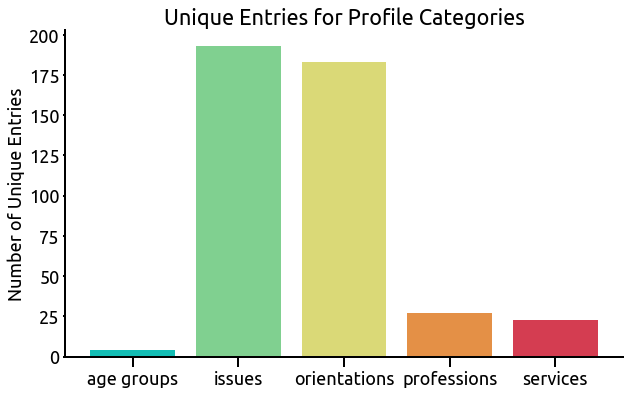

In [14]:
heights = [age_groups_unique_size, issues_unique_size, orientations_unique_size,
           professions_unique_size, service_unique_size]
labels = ['age groups', 'issues', 'orientations', 'professions', 'services']
colors = [palette[i] for i in range(len(heights))]

fig, ax = plt.subplots()
ax.set_title('Unique Entries for Profile Categories')
ax.set_ylabel('Number of Unique Entries')
ax.bar(height = heights, x=labels, color=colors)
plt.savefig('../img/uniques_per_category.png')
plt.show()

In [29]:
# Avg category per therapist

In [30]:
len(df['primary_credential'].unique())

203

In [31]:
creds = df['primary_credential'].unique()
#creds.sort()
for c in creds:
    print(c)

Licensed Clinical Social Worker - CSW00992525
Psychologist - 3123 
LCSW - CSW.09925366 
LPC - 0013676
None
LMFT
Licensed Professional Counselor Candidate - 08122023
Licensed Professional Counselor
Licensed Clinical Social Worker - 992133
Licensed Professional Counselor - 0015347
Licensed Professional Counselor - LPC-4858
Registered NLC CO
Registered Psychotherapist
Marriage and Family Therapist Candidate
Licensed Professional Counselor - LPC.0015594
LMFT - 0001420
Licensed Social Worker - LSW.0009922613
Clinical Psychologist
LPCC - LPCC.0014990
Licensed Professional Counselor - LPC.0016002
LPC
LPCC
LPC - LPC.0012737
LCSW - 1276
Licensed Professional Counselor Candidate - LPCC.0015516
Licensed Professional Counselor - 4518
MAMFT and Certified Play Therapist - #103286
Licensed Marriage & Family Therapist - 0001295
Professional Counselor - 0014629
Psychologist - PSY.0002890
LPC - 5592
Licensed Professional Counselor (LPC) - 0013388
Psychologist
Psychologist - 3279
Licensed Marriage and Fa